# Enamel Thickness Boxplot

The plot that will be reproduced here

![](images/enamelthickness_plot.png)

The data underlying this plot are included in the supplementary material of the paper and have been extracted and made available in my bioanth datasets repository.

## Preliminaries

First, I always change the R option for importing strings (I find that the default convert to factor causes more problems than it solves).

In [1]:
options(stringsAsFactors=F)

Next, import the data. The resulting data frame has nine variables: accession, tooth, enamel_area (mm$^2$), dentine_area (mm$^2$), edj_length (enamel-dentine junction, mm), bcd (bi-cervical diameter, mm), aet (average enamel thickness, mm), and ret (relative enamel thickness).

In [7]:
dset = read.csv(url("https://raw.githubusercontent.com/ryanraaum/bioanth-datasets/master/raw/enamelthickness.csv"))
str(dset)

'data.frame':	195 obs. of  9 variables:
 $ accession   : chr  "AL145-35" "AL333w-1a" "AL128-23" "AL145-35" ...
 $ taxon       : chr  "A. afarensis" "A. afarensis" "A. afarensis" "A. afarensis" ...
 $ tooth       : chr  "M1" "M1" "M2" "M2" ...
 $ enamel_area : num  26.2 24.3 20.7 29.8 29.4 ...
 $ dentine_area: num  46.7 39.3 29.7 46.5 33.4 ...
 $ edj_length  : num  20.9 18.8 16.4 20.1 17.9 ...
 $ bcd         : num  11.5 11.2 11.2 12.1 12.6 ...
 $ aet         : num  1.26 1.29 1.26 1.48 1.64 1.54 1.55 1.52 1.29 1.78 ...
 $ ret         : num  18.4 20.6 23.2 21.7 28.4 ...


The full dataset includes some specimens with "Uncertain" taxonomic affiliation that are not included in the targeted boxplot and *A. aethiopicus* is also dropped. So it's easiest to subset out those samples for the plotting going forward.

In [9]:
dset2 = subset(dset, !(taxon %in% c("Uncertain", "A. aethiopicus")))
nrow(dset)
nrow(dset2)

[1] 195

[1] 185

For the plot, the chimpanzee species need to be merged and an ordered factor will be useful to have everything plot in the same order. So, get things set up for that.

In [17]:
# make up a mapping vector to get new labels
taxa = c("A. afarensis", "A. africanus", "A. anamensis", "Gorilla sp.",      
         "Homo sapiens ", "Pan paniscus", "Pan troglodytes", "Pongo sp.", 
         "Homo erectus", "Homo sp. indet.", "A. boisei", "A. robustus")
map_labels = c("Aafar", "Aafri", "Aana", "Gorilla",
               "Hsap", "Pan", "Pan", "Pongo", 
               "Here", "Hsp", "Aboi", "Arob")
names(map_labels) = taxa

# new group labels for all specimens in the reduced data set
newgroups = map_labels[dset2$taxon]

# set up the desired order
desiredorder = c("Aana", "Aafar", "Aafri", "Aboi", "Arob", "Hsp", 
                 "Here", "Hsap", "Pongo", "Gorilla", "Pan")

# make the new groups into an ordered factor
newgroups = factor(newgroups, levels=desiredorder, ordered=T)

# add it to the data frame
dset2$otaxon = newgroups

## Base R

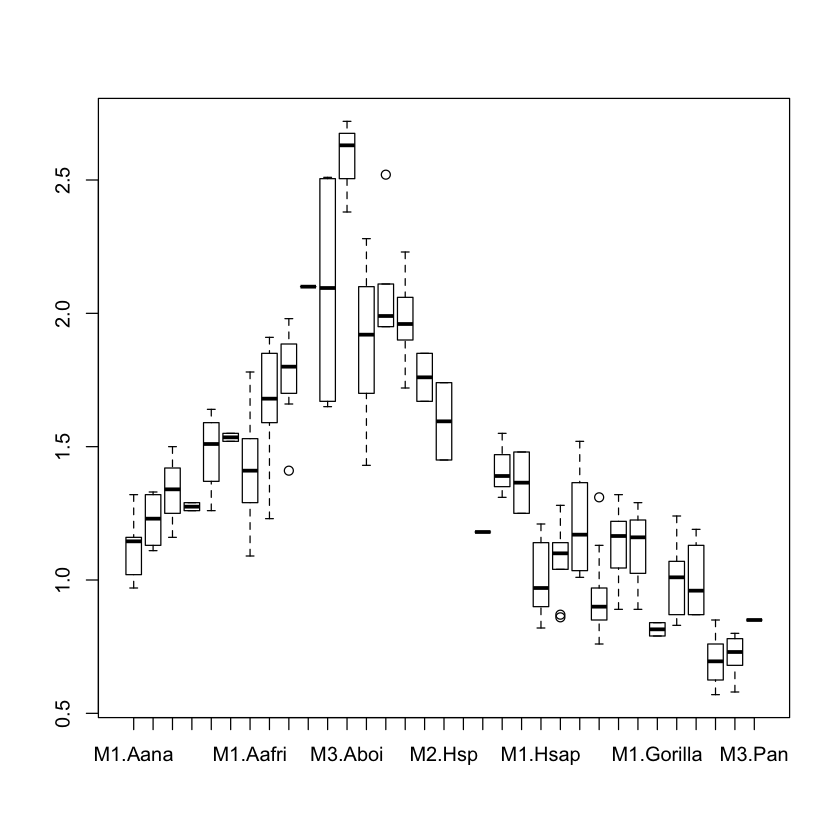

In [23]:
boxplot(aet ~ tooth * otaxon, data=dset2)

## ggplot2

## lattice